In [ ]:
pip install ucimlrepo

In [ ]:
# @title Importing the Dataset
import pandas as pd
from ucimlrepo import fetch_ucirepo
df=fetch_ucirepo(id=2)
x=df.data.features
y=df.data.targets

In [ ]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [ ]:
x.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [ ]:
# @title Classifying into Categorical and Numerical Columns
cc=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
nc=['age','education-num','fnlwgt','capital-gain','capital-loss','hours-per-week']

In [ ]:
# @title Fixing Null Values
for c in nc:
  mean=x[c].mean()
  x[c]=x[c].fillna(mean)
for c in cc:
  mode=x[c].mode().iloc[0]
  x[c]=x[c].fillna(mode)

<ipython-input-3-8861670c5781>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[c]=x[c].fillna(mean)
<ipython-input-3-8861670c5781>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[c]=x[c].fillna(mode)


In [ ]:
x.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
y.isnull().sum()

,0
income,0


In [ ]:
# @title Encoding Categoric Features
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in cc:
    x[col]=l.fit_transform(x[col])
x.head(5)

<ipython-input-4-3e7d1a0759c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=l.fit_transform(x[col])
<ipython-input-4-3e7d1a0759c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=l.fit_transform(x[col])
<ipython-input-4-3e7d1a0759c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [ ]:
import numpy as np
y['income']=y['income'].str.strip().str.replace('.', '', regex=False)
y['income']=y['income'].map({'<=50K': 0, '>50K': 1})

<ipython-input-5-de249bea39f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].str.strip().str.replace('.', '', regex=False)
<ipython-input-5-de249bea39f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
y=np.ravel(y)

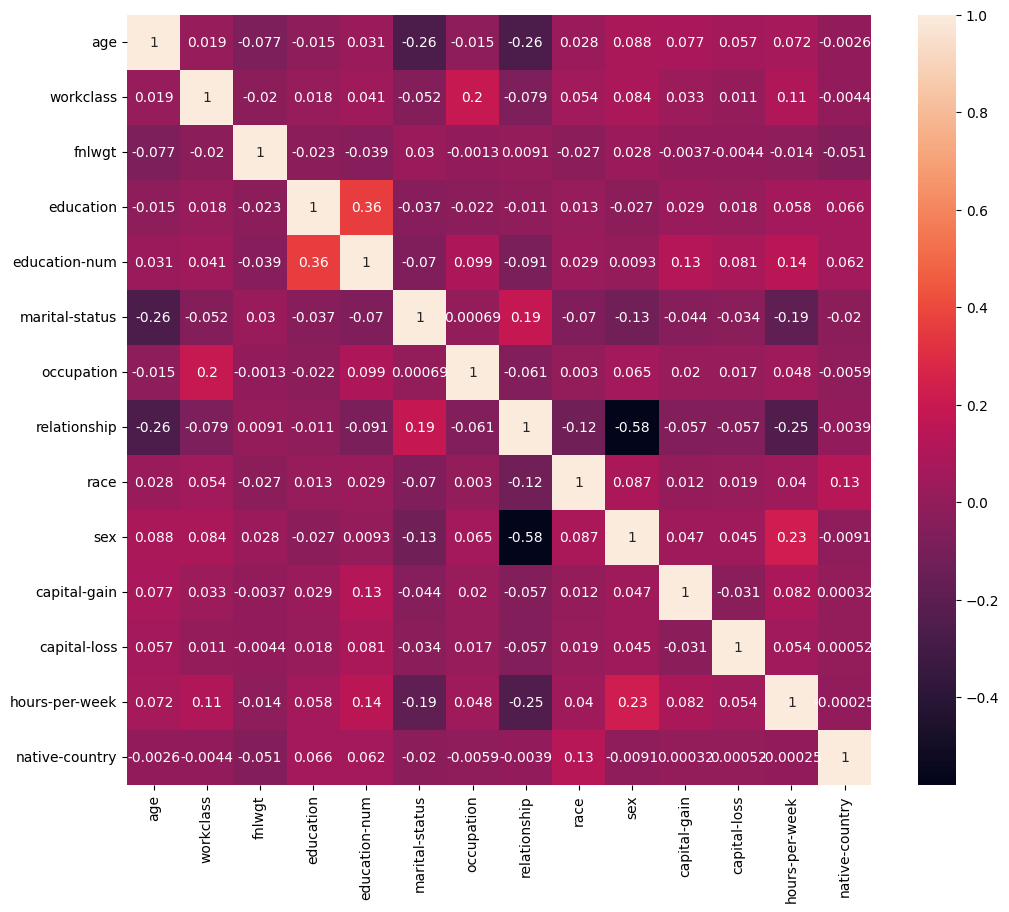

In [ ]:
# @title Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr=x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
# @title Selecting the Best Features
cm=x.corr()
hc=set()
for i in range(len(cm.columns)):
    for j in range(i):
        if abs(cm.iloc[i, j])>0.5:
            col = cm.columns[i]
            hc.add(col)
x.drop(columns=hc,inplace=True)
x.head(5)

<ipython-input-7-61490f8a5353>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=hc,inplace=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,40,5


In [ ]:
# @title Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# @title Scaling Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

# **KNN:**

k=1
Confusion Matrix:
 [[6467  947]
 [1032 1323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      7414
           1       0.58      0.56      0.57      2355

    accuracy                           0.80      9769
   macro avg       0.72      0.72      0.72      9769
weighted avg       0.79      0.80      0.80      9769

AUC: 0.717026060182234
Testing Accuracy: 0.7974204115057836
Cross-Validation Accuracies: [0.73763947 0.7364111  0.73147011 0.73505324 0.73321048]
Average Accuracies:  0.7347568785714963


k=3
Confusion Matrix:
 [[6653  761]
 [1039 1316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      7414
           1       0.63      0.56      0.59      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.73      0.74      9769
weighted avg       0.81      0.82      0.81      9769

AUC: 0.814

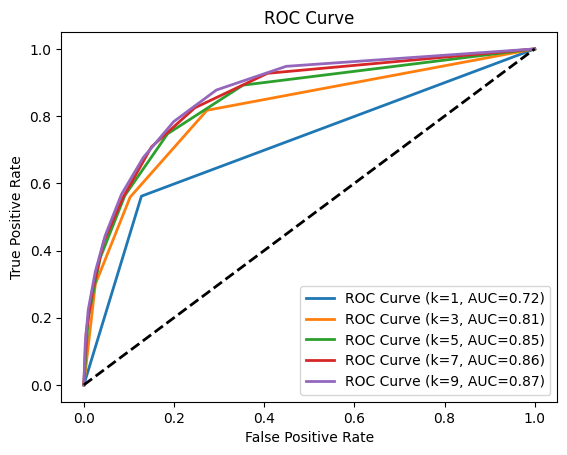

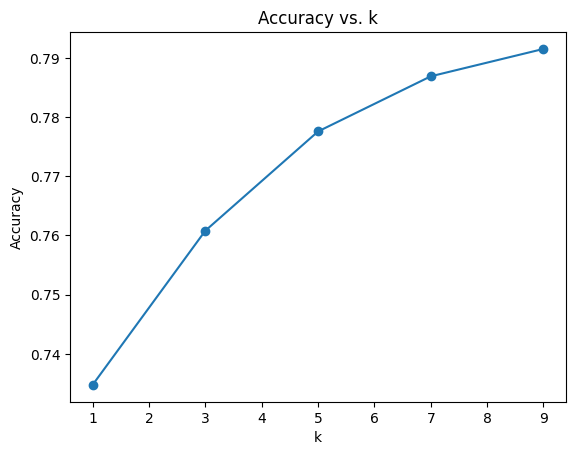

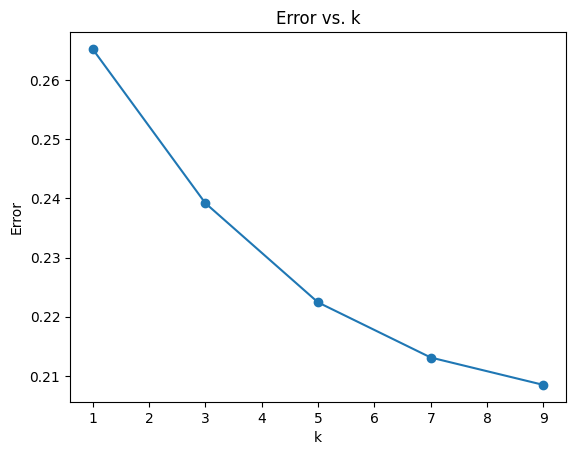

Best k: 9
Best Accuracy: 0.7915113549697437


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
kval=[1, 3, 5, 7, 9]
bestk=None
bestacc=0
accval=[]
errors=[]
for k in kval:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    yproba=knn.predict_proba(xtest)[:, 1]
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    acc=accuracy_score(ytest,ypred)
    fpr,tpr,_=roc_curve(ytest,yproba)
    area=auc(fpr, tpr)
    cva=cross_val_score(knn,x,y,cv=5)
    meancva=cva.mean()
    accval.append(meancva)
    error=1-meancva
    errors.append(error)
    print(f"k={k}")
    print("Confusion Matrix:\n",cm)
    print("Classification Report:\n",cr)
    print("AUC:",area)
    print("Testing Accuracy:",acc)
    print("Cross-Validation Accuracies:",cva)
    print("Average Accuracies: ",meancva)
    print("\n")
    if meancva>bestacc:
        bestk=k
        bestacc=meancva
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (k={k}, AUC={area:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
plt.figure()
plt.plot(kval,accval,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()
plt.figure()
plt.plot(kval,errors,marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error vs. k')
plt.show()
print("Best k:",bestk)
print("Best Accuracy:",bestacc)

# **Decision Tree:**

For Max Depth: None, Min Samples Leaf: 1;
Confusion Matrix:
 [[6460  954]
 [ 943 1412]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7414
           1       0.60      0.60      0.60      2355

    accuracy                           0.81      9769
   macro avg       0.73      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769

AUC: 0.7356079363252056
Testing Accuracy: 0.8058143105742656
Cross-Validation Accuracies: [0.81502713 0.81492476 0.8203317  0.81582719 0.80354218]
Average Accuracy:  0.8139305906656711


For Max Depth: None, Min Samples Leaf: 2;
Confusion Matrix:
 [[6643  771]
 [1035 1320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      7414
           1       0.63      0.56      0.59      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.73      0.74 

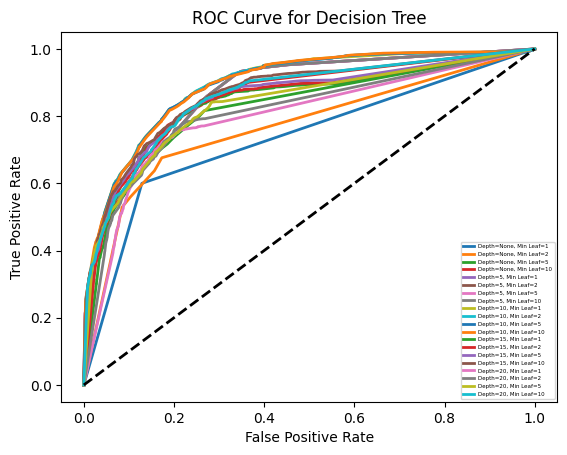

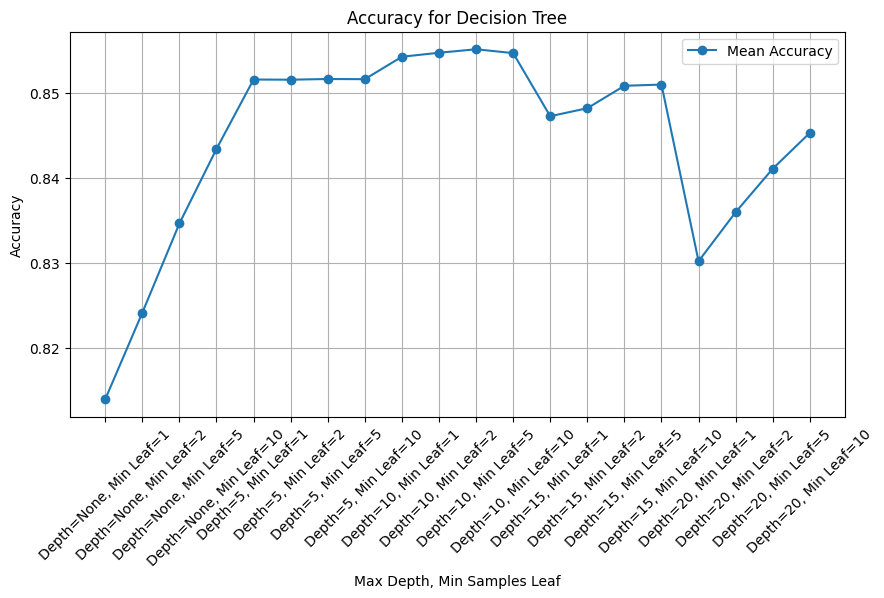

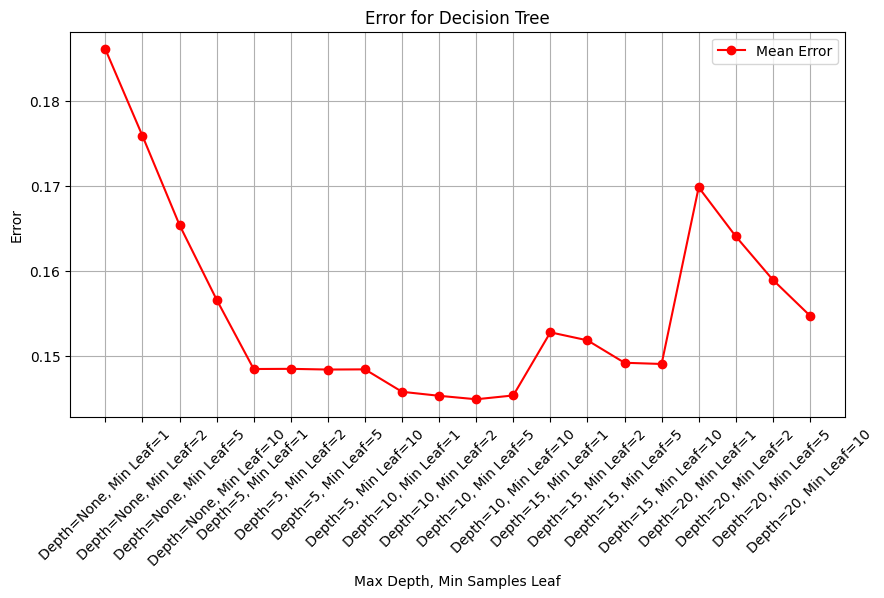

Best Combination: (10, 5)
Best Accuracy: 0.8551451972170572


In [ ]:
from sklearn.tree import DecisionTreeClassifier
depth=[None,5,10,15,20]
leaf=[1,2,5,10]
best=None
bestacc=0
accval=[]
errors=[]
for d in depth:
    for l in leaf:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_leaf=l)
        dt.fit(xtrain,ytrain)
        ypred=dt.predict(xtest)
        yproba=dt.predict_proba(xtest)[:, 1]
        cm=confusion_matrix(ytest,ypred)
        cr=classification_report(ytest,ypred)
        fpr, tpr, _=roc_curve(ytest,yproba)
        area=auc(fpr,tpr)
        cva=cross_val_score(dt,x,y,cv=5)
        meancva=cva.mean()
        accval.append(meancva)
        error=1-meancva
        errors.append(error)
        print(f"For Max Depth: {d}, Min Samples Leaf: {l};")
        print("Confusion Matrix:\n",cm)
        print("Classification Report:\n",cr)
        print("AUC:",area)
        print("Testing Accuracy:",accuracy_score(ytest,ypred))
        print("Cross-Validation Accuracies:",cva)
        print("Average Accuracy: ",meancva)
        print("\n")
        if meancva>bestacc:
            bestacc=meancva
            best=(d,l)
        plt.plot(fpr, tpr, lw=2, label=f'Depth={d}, Min Leaf={l}')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right',fontsize=4)
plt.show()
plt.figure(figsize=(10, 5))
x1=[f"Depth={d}, Min Leaf={l}" for d in depth for l in leaf]
plt.plot(x1, accval, marker='o', label='Mean Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Max Depth, Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy for Decision Tree')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(x1, errors, marker='o', label='Mean Error', color='red')
plt.xticks(rotation=45)
plt.xlabel('Max Depth, Min Samples Leaf')
plt.ylabel('Error')
plt.title('Error for Decision Tree')
plt.grid()
plt.legend()
plt.show()
print("Best Combination:", best)
print("Best Accuracy:", bestacc)

# **Random Forest**

Number of Trees: 10,Max Depth: None;
Confusion Matrix:
 [[6917  497]
 [1021 1334]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7414
           1       0.73      0.57      0.64      2355

    accuracy                           0.84      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.84      0.84      9769

AUC: 0.8758380455407428
Cross-Validation Accuracies: [0.84747671 0.84911455 0.85298935 0.8462326  0.8466421 ]
Average Accuracy:  0.848491060785052
Testing Accuracy:  0.8446105026102979


Number of Trees: 10,Max Depth: 5;
Confusion Matrix:
 [[7078  336]
 [1156 1199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7414
           1       0.78      0.51      0.62      2355

    accuracy                           0.85      9769
   macro avg       0.82      0.73      0.76      9769
wei

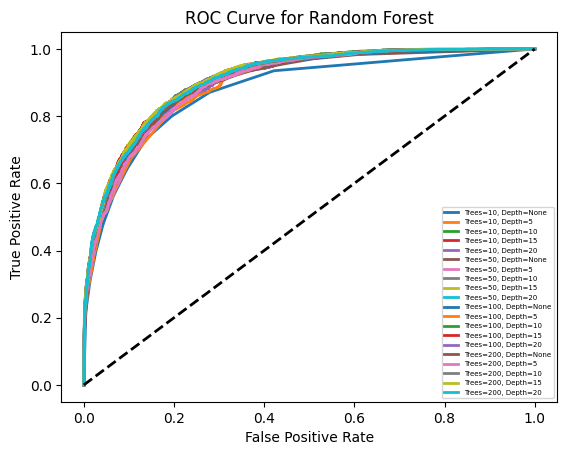

Best Configuration: (50, 15)
Best Accuracy: 0.8649318545879094


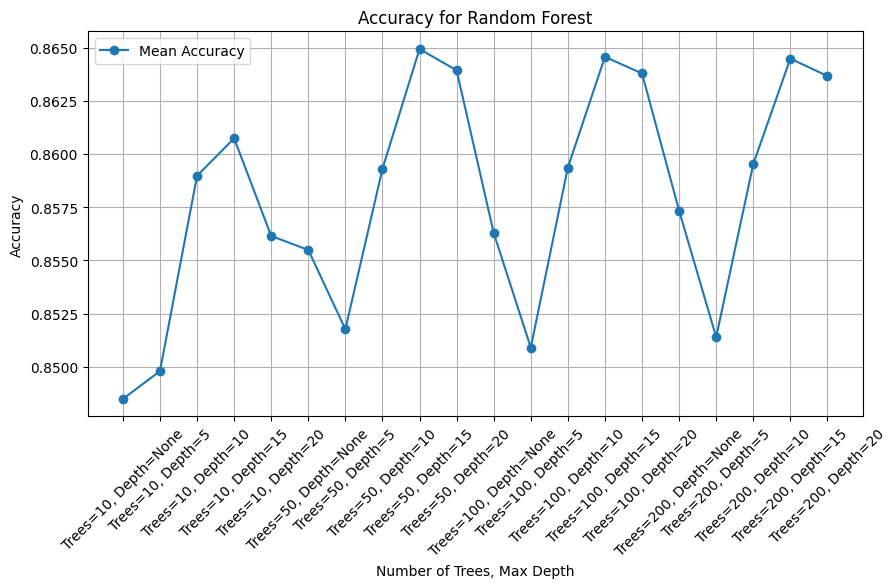

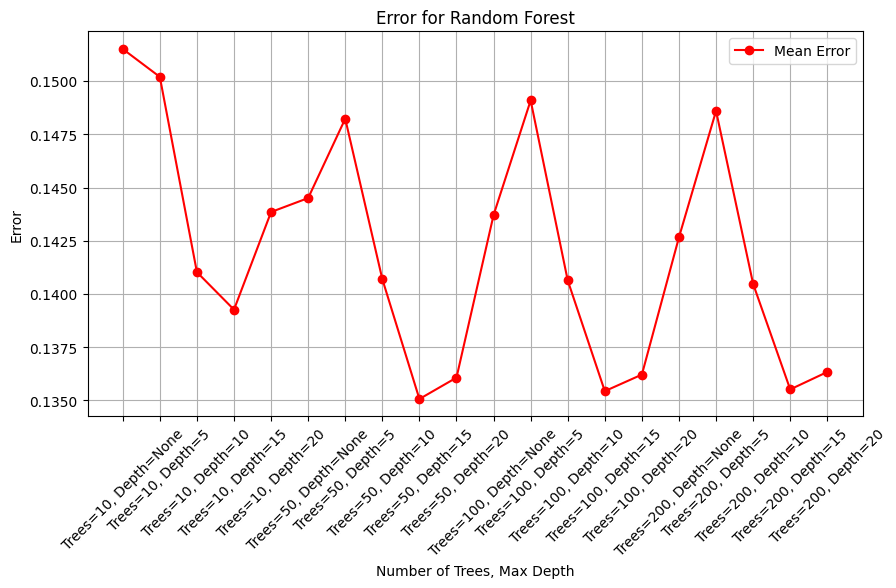

Best Combination: (50, 15)
Best Accuracy: 0.8649318545879094


In [ ]:
from sklearn.ensemble import RandomForestClassifier
n=[10,50,100,200]
depth=[None,5,10,15,20]
best=None
bestacc=0
accval=[]
errors=[]

for n1 in n:
    for d in depth:
        rf=RandomForestClassifier(n_estimators=n1,max_depth=d,random_state=42)
        rf.fit(xtrain,ytrain)
        ypred=rf.predict(xtest)
        yproba=rf.predict_proba(xtest)[:, 1]
        cm=confusion_matrix(ytest,ypred)
        cr=classification_report(ytest,ypred)
        fpr,tpr, _=roc_curve(ytest,yproba)
        area=auc(fpr,tpr)
        cva=cross_val_score(rf,x,y,cv=5)
        meancva=cva.mean()
        accval.append(meancva)
        error=1-meancva
        errors.append(error)
        acc=accuracy_score(ytest, ypred)
        print(f"Number of Trees: {n1},Max Depth: {d};")
        print("Confusion Matrix:\n",cm)
        print("Classification Report:\n",cr)
        print("AUC:",area)
        print("Cross-Validation Accuracies:",cva)
        print("Average Accuracy: ",meancva)
        print("Testing Accuracy: ",acc)
        print("\n")
        if meancva>bestacc:
            bestacc=meancva
            best=(n1,d)
        plt.plot(fpr, tpr, lw=2, label=f'Trees={n1}, Depth={d}')
plt.plot([0, 1],[0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right',fontsize=5)
plt.show()
print("Best Configuration:",best)
print("Best Accuracy:", bestacc)
plt.figure(figsize=(10, 5))
x1=[f"Trees={n2}, Depth={d}" for n2 in n for d in depth]
plt.plot(x1,accval,marker='o',label='Mean Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Number of Trees, Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy for Random Forest')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(x1,errors,marker='o',label='Mean Error',color='red')
plt.xticks(rotation=45)
plt.xlabel('Number of Trees, Max Depth')
plt.ylabel('Error')
plt.title('Error for Random Forest')
plt.grid()
plt.legend()
plt.show()
print("Best Combination:", best)
print("Best Accuracy:", bestacc)


# **AdaBoost:**

Base Model:DecisionTreeClassifier, Estimators: 100;
Confusion Matrix:
 [[6912  502]
 [ 883 1472]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7414
           1       0.75      0.63      0.68      2355

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769

AUC: 0.9109876477450991
Cross-Validation Accuracies: [0.8599652  0.85781554 0.86373874 0.86158886 0.85790336]
Average Accuracy:  0.86020233864179
Testing Accuracy:  0.8582249974408844


Base Model:DecisionTreeClassifier, Estimators: 150;
Confusion Matrix:
 [[6906  508]
 [ 873 1482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7414
           1       0.74      0.63      0.68      2355

    accuracy                           0.86      9769
   macro avg       0.82  

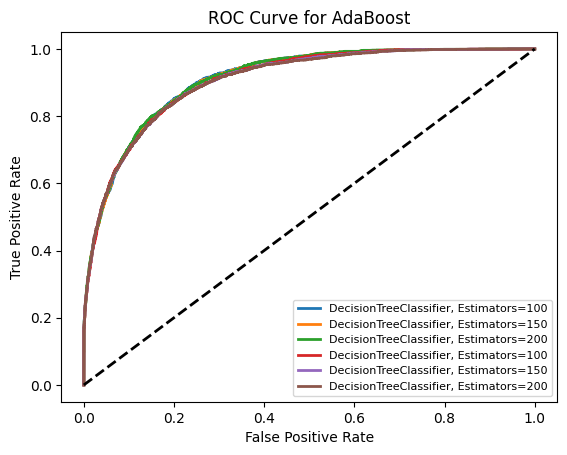

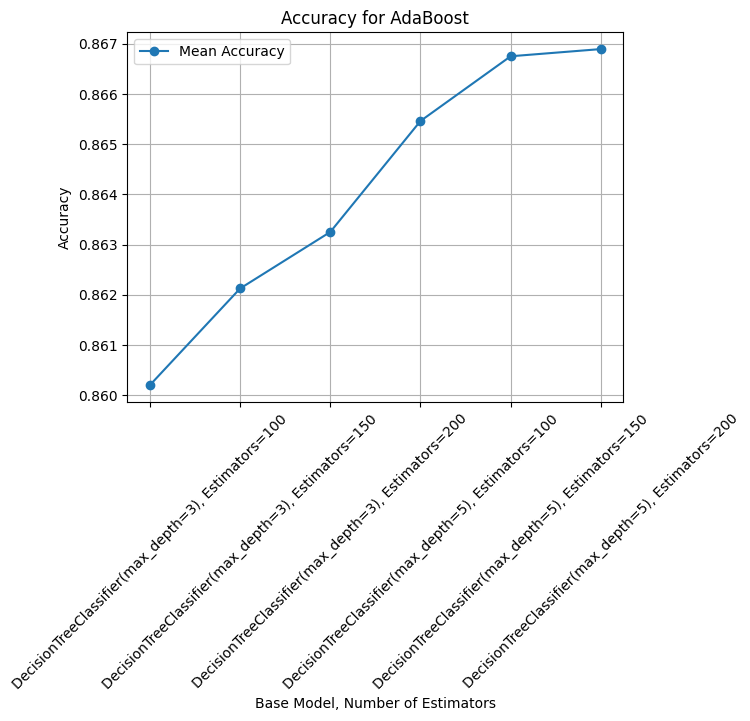

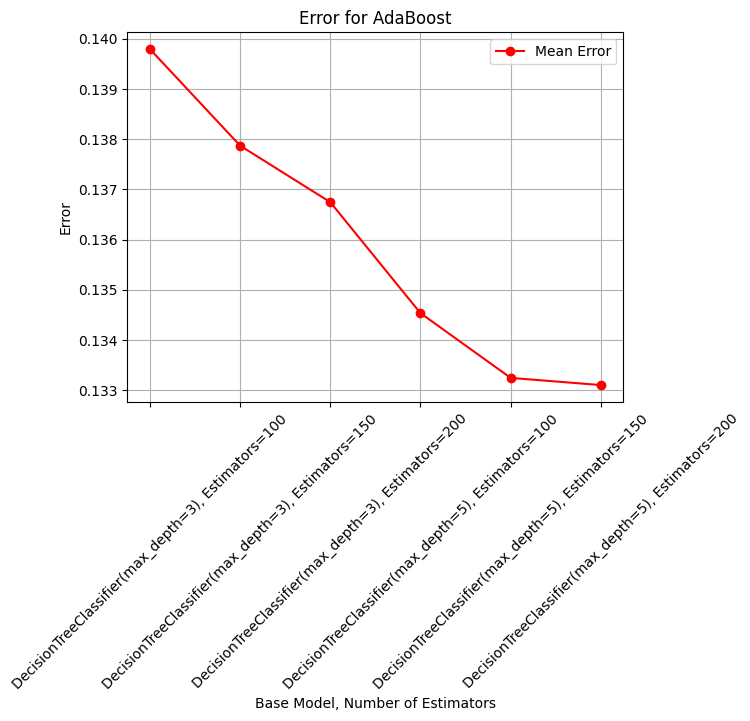

Best Combination: ('DecisionTreeClassifier', 200)
Best Accuracy: 0.8668973622372128


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
bm=[DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5)]
n=[100,150,200]
best=None
bestacc=0
accval=[]
errors=[]
for b in bm:
    for n1 in n:
        ada=AdaBoostClassifier(estimator=b,n_estimators=n1,algorithm='SAMME',random_state=42)
        ada.fit(xtrain, ytrain)
        ypred=ada.predict(xtest)
        yproba=ada.predict_proba(xtest)[:,1]
        cm=confusion_matrix(ytest,ypred)
        cr=classification_report(ytest,ypred)
        fpr,tpr, _=roc_curve(ytest,yproba)
        area=auc(fpr, tpr)
        cva=cross_val_score(ada, x, y, cv=5)
        meancva=cva.mean()
        accval.append(meancva)
        error=1-meancva
        errors.append(error)
        acc=accuracy_score(ytest, ypred)
        print(f"Base Model:{type(b).__name__}, Estimators: {n1};")
        print("Confusion Matrix:\n",cm)
        print("Classification Report:\n",cr)
        print("AUC:",area)
        print("Cross-Validation Accuracies:",cva)
        print("Average Accuracy: ",meancva)
        print("Testing Accuracy: ",acc)
        print("\n")
        if meancva>bestacc:
            bestacc=meancva
            best=(type(b).__name__,n1)
        plt.plot(fpr, tpr, lw=2, label=f'{type(b).__name__}, Estimators={n1}')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right', fontsize=8)
plt.show()
plt.figure()
x1=[f'{m}, Estimators={n2}' for m in bm for n2 in n]
plt.plot(x1, accval, marker='o', label='Mean Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Base Model, Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy for AdaBoost')
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(x1, errors, marker='o', label='Mean Error', color='red')
plt.xticks(rotation=45)
plt.xlabel('Base Model, Number of Estimators')
plt.ylabel('Error')
plt.title('Error for AdaBoost')
plt.grid()
plt.legend()
plt.show()
print("Best Combination:", best)
print("Best Accuracy:", bestacc)

# **Stacking:**

Confusion Matrix:
 [[6996  418]
 [ 950 1405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      7414
           1       0.77      0.60      0.67      2355

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

AUC: 0.9105279963253086
Cross-Validation Accuracies: [0.86518579 0.86303613 0.86732187 0.86087224 0.86466011]
Average Accuracy:  0.8642152288712838
Testing Accuracy:  0.8599651960282526


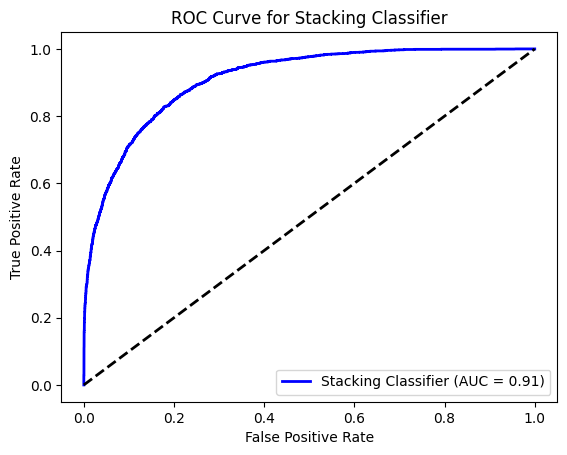

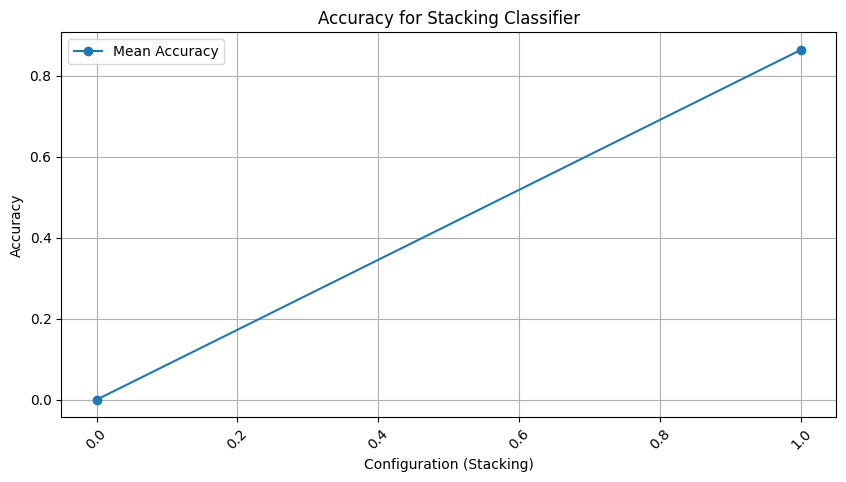

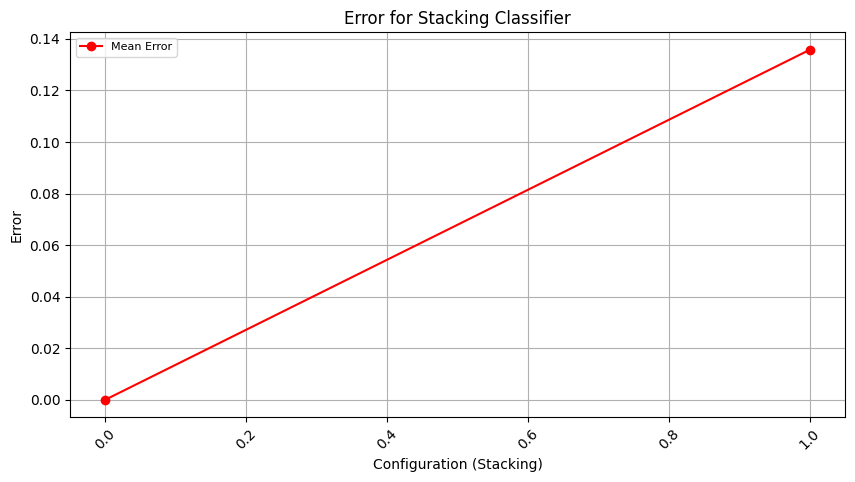

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
bm=[('knn', KNeighborsClassifier(n_neighbors=9)),('dt', DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)),('rf', RandomForestClassifier(n_estimators=50, max_depth=15))]
mm=LogisticRegression()
sm=StackingClassifier(estimators=bm,final_estimator=mm,cv=5)
sm.fit(xtrain, ytrain)
ypred=sm.predict(xtest)
yproba=sm.predict_proba(xtest)[:, 1]
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
fpr,tpr,_=roc_curve(ytest,yproba)
area=auc(fpr, tpr)
cva=cross_val_score(sm,x,y,cv=5)
meancva=cva.mean()
acc=accuracy_score(ytest, ypred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("AUC:", area)
print("Cross-Validation Accuracies:", cva)
print("Average Accuracy: ", meancva)
print("Testing Accuracy: ",acc)
plt.figure()
plt.plot(fpr,tpr,lw=2, label='Stacking Classifier (AUC = {:.2f})'.format(area), color='blue')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend(loc='lower right')
plt.show()
accval=[0,meancva]
plt.figure(figsize=(10, 5))
plt.plot([0,1], accval, marker='o', label='Mean Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Configuration (Stacking)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Stacking Classifier')
plt.grid()
plt.legend()
plt.show()
errors=[0,1-meancva]
plt.figure(figsize=(10, 5))
plt.plot([0,1], errors, marker='o', label='Mean Error', color='red')
plt.xticks(rotation=45)
plt.xlabel('Configuration (Stacking)')
plt.ylabel('Error')
plt.title('Error for Stacking Classifier')
plt.grid()
plt.legend(fontsize=8)
plt.show()
